In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in Data 8.


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_scatter(r):
    """Generate a scatter plot with a correlation approximately r"""
    plots.figure(figsize=(5,5))
    x, y = make_correlated_data(r)
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    
def r_table(r):
    """
    Generate a table of 1000 data points with a correlation approximately r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

## Prediction lines

In [3]:
example = r_table(0.99)
example.show(3)

x,y
0.0912047,-0.0680119
1.09128,1.04391
-1.94697,-1.88316


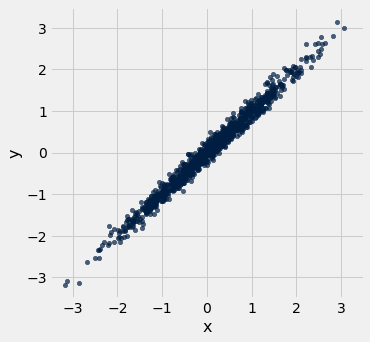

In [4]:
example.scatter('x', 'y')
resize_window()

In [5]:
def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
    return np.mean(neighbors.column('y'))
    

In [6]:
nn_prediction_example(-2.25)

-2.1476337989800522

In [7]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

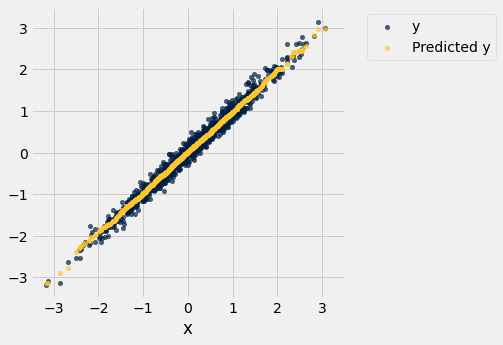

In [8]:
example.scatter('x')
resize_window()

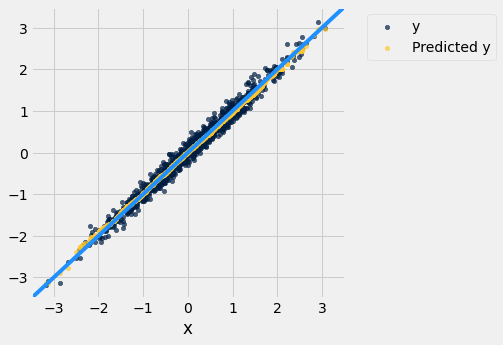

In [9]:
example.scatter('x')
draw_line(slope=1, color='dodgerblue')
resize_window()

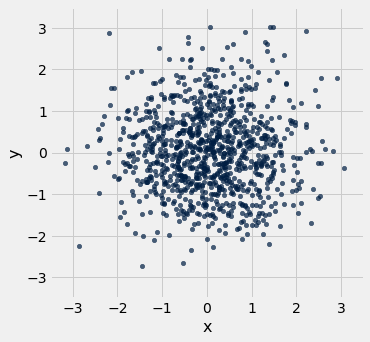

In [10]:
example = r_table(0)
example.scatter('x', 'y')
resize_window()

In [11]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

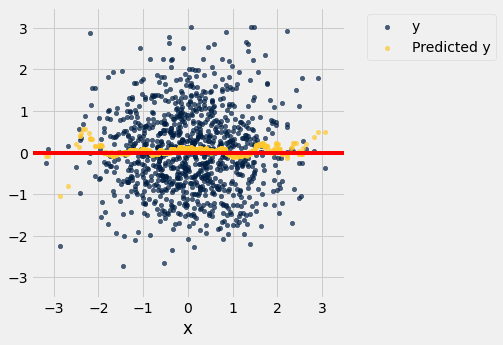

In [12]:
example = example.with_column(
    'Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope = 0)
resize_window()

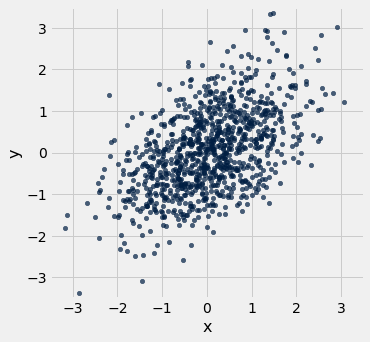

In [13]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()

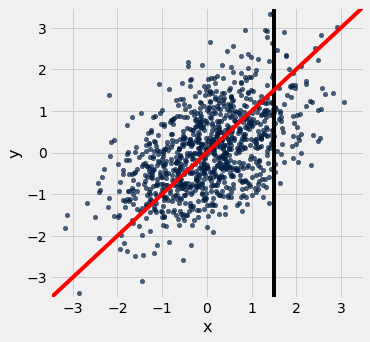

In [14]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()
draw_vertical_line(1.5)
draw_line(slope=1, intercept=0)

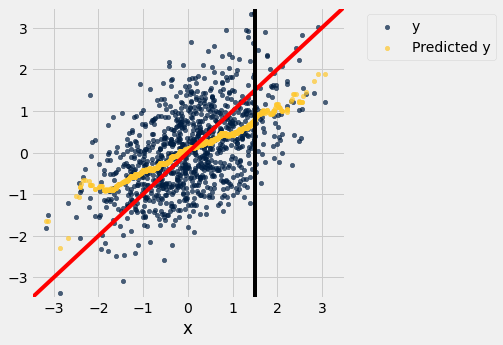

In [15]:
example = example.with_column('Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=1)
draw_vertical_line(1.5)
resize_window()

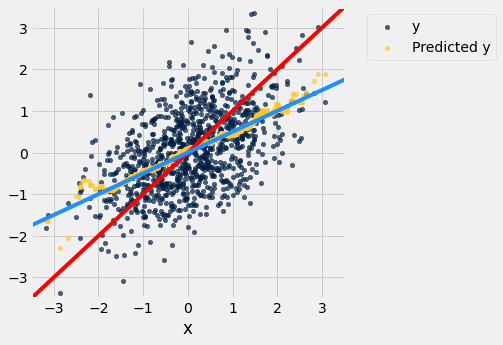

In [16]:
example.scatter('x')
draw_line(slope=1, intercept=0, color='red')
draw_line(slope=0.5, intercept=0, color='dodgerblue')
resize_window()

In [17]:
# Questions?
# Slides

## Linear regression: defining the line

In [18]:
# Copy-pasted from above
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)


In [19]:
def slope(t, x, y):
    r = correlation(t, x, y)
    slope = np.std(t.column(y)) / np.std(t.column(x)) * r
    return slope
def intercept(t, x, y):
    m = slope(t, x, y)
    return np.mean(t.column(y)) - m * np.mean(t.column(x))

In [20]:
example = r_table(0.5)
slope(example, 'x', 'y')
intercept(example, 'x', 'y')

0.03801479544542581

## Movies Data

In [21]:
movies = Table.read_table('movies.csv')
movies.show(11)

Year,Title,Distributor,Domestic Gross,Budget,Category,Yanay Watched,Katherine Watched
2021,A Quiet Place Part II*,Paramount,136,61,Horror,0,0
2021,Godzilla vs. Kong*,Warner Bros.,100,177.5,Other,1,0
2021,Cruella*,Disney,71,150,Other,0,0
2021,F9*,Universal,70,200,Other,0,0
2021,The Conjuring: The Devil Made Me Do It*,Warner Bros.,59,39,Horror,0,0
2021,Raya and the Last Dragon*,Disney,54,100,Animated,1,0
2021,Tom & Jerry*,Warner Bros.,46,79,Other,0,0
2021,Mortal Kombat*,Warner Bros.,42,55,Other,1,0
2021,Peter Rabbit 2: The Runaway*,Sony Pictures,29,107.9,Other,0,0
2021,Wrath of Man*,MGM,27,40,Other,0,0


In [22]:
cash = movies.select("Budget", "Domestic Gross")
cash

Budget,Domestic Gross
61,136
177.5,100
150,71
200,70
39,59
100,54
79,46
55,42
107.9,29
40,27


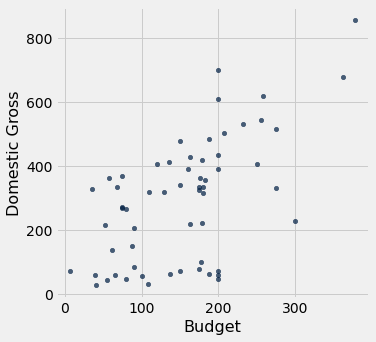

In [23]:
cash.scatter('Budget')

In [24]:
def predict_gross_nn(b):
    """Return a prediction of the domestic gross for a movie 
    with a budget of b
    
    The prediction is the average domestic gross of the movies
    whose budget is in the range b plus or minus $20 million dollars.
    """
    
    close_points = cash.where('Budget', are.between(b-20, b+20))
    return np.mean(close_points.column("Domestic Gross"))   

In [25]:
cash_with_predictions = cash.with_column(
    'Prediction', cash.apply(predict_gross_nn, 'Budget')
    )

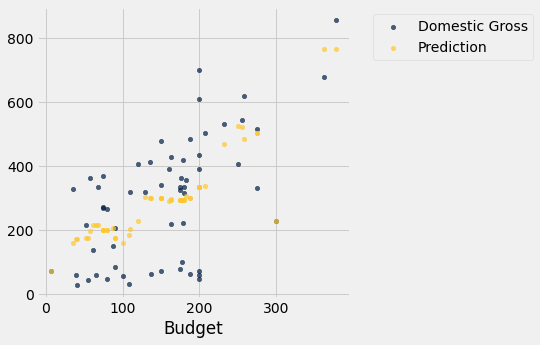

In [26]:
cash_with_predictions.scatter('Budget')

In [27]:
nn_prediction = predict_gross_nn(200)
nn_prediction

335.84615384615387

In [28]:
cash_slope = slope(cash, "Budget", "Domestic Gross")
cash_intercept = intercept(cash, "Budget", "Domestic Gross")
cash_slope, cash_intercept

(1.475518209961451, 68.05732993237851)

In [29]:
linear_prediction = cash_slope * 200 + cash_intercept
linear_prediction

363.16097192466873

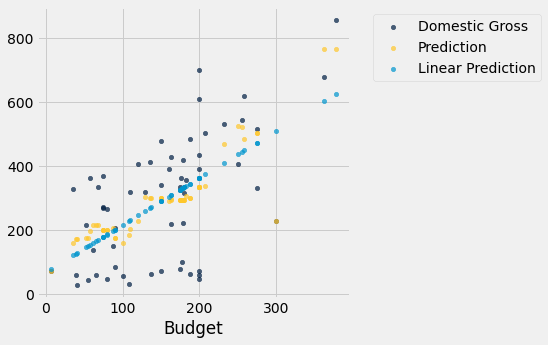

In [30]:
linear_predictions = cash_slope * cash.column("Budget") + cash_intercept
cash_with_predictions.with_column("Linear Prediction", linear_predictions).scatter("Budget")

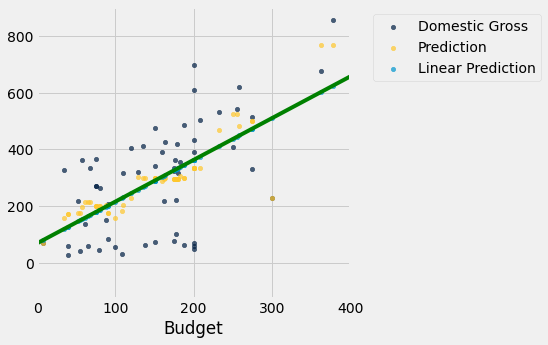

In [31]:
cash_with_predictions.with_column("Linear Prediction", linear_predictions).scatter("Budget")

# plot a line (oos)
x_vals = make_array(-100, 500)
linear_predictions_range = cash_slope * x_vals + cash_intercept
plots.plot(x_vals, linear_predictions_range, c="g");
plots.xlim([0, 400]);